In [ ]:
!pip install pandas
!pip install scikit-learn

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree

# Load Dataset
Inisialisasi variable, masukan NIM di sini untuk random state.

Random state digunakan untuk training & validation split.

In [3]:
filepath = "./seeds_dataset.csv"
dot_filename = 'tree.dot'
# Isi nim anda di sini
nim = 1234567890

Load dataset, cek konten data

Target kelas: **Category** 

In [4]:
df = pd.read_csv(filepath, sep="\t")
df.sample(10, random_state=nim)

,Area,Perimeter,Compactness,Kernel_len,Kernel_width,Assymetry,Groove_len,Category
113,19.14,16.61,0.8722,6.259,3.737,6.682,6.053,2
49,14.86,14.67,0.8676,5.678,3.258,2.129,5.351,1
157,12.13,13.73,0.8081,5.394,2.745,4.825,5.220,3
200,12.38,13.44,0.8609,5.219,2.989,5.472,5.045,3
108,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,2
150,11.83,13.23,0.8496,5.263,2.840,5.195,5.307,3
79,17.12,15.55,0.8892,5.850,3.566,2.858,5.746,2
112,19.13,16.31,0.9035,6.183,3.902,2.109,5.924,2
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
135,15.38,14.66,0.8990,5.477,3.465,3.600,5.439,2


Lakukan training & test split.

Gunakan random state untuk splitting di sini.

Training/test split **60/40**

In [5]:
# X: semua kolom, Y: kolom terakhir (category)
x = df.iloc[:, 0:-1]
y = df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.6, random_state=nim)

len(x_train), len(x_test)


(126, 84)

Boleh menggunakan **DecisionTreeClassifier** library, atau Decision Tree library lainnya.

Catatan: Tidak diperbolehkan menggunakan **RandomForestClassifier**

In [6]:
# Hitung jumlah fitur yang dipergunakan
nr_features = len(x_train.columns)

# Bangun decision tree menggunakan entropy, dengan batasan max_depth = nr_feature + 1
# Note: Kedalaman tree dibatasi untuk mempermudah visualisasi
rf_model = tree.DecisionTreeClassifier(criterion="entropy", max_depth=nr_features+1)
rf_model = rf_model.fit(x_train, y_train)

# Prediksi hasil di data test dan hitung akurasi

In [7]:
predictions = rf_model.predict(x_test)

In [8]:
correct = predictions == y_test
acc = np.sum(correct) / len(predictions)
acc



0.8928571428571429

# Visualisasi tree

Export tree ke dot file

Lalu export ke png (mungkin membutuhkan graphviz atau pydotplus)

In [9]:
dot_data = tree.export_graphviz(rf_model, out_file=dot_filename,
                feature_names = x.columns.values,
                class_names = y.unique().astype(str),
                rounded = True, proportion = False, 
                precision = 1, filled = True)

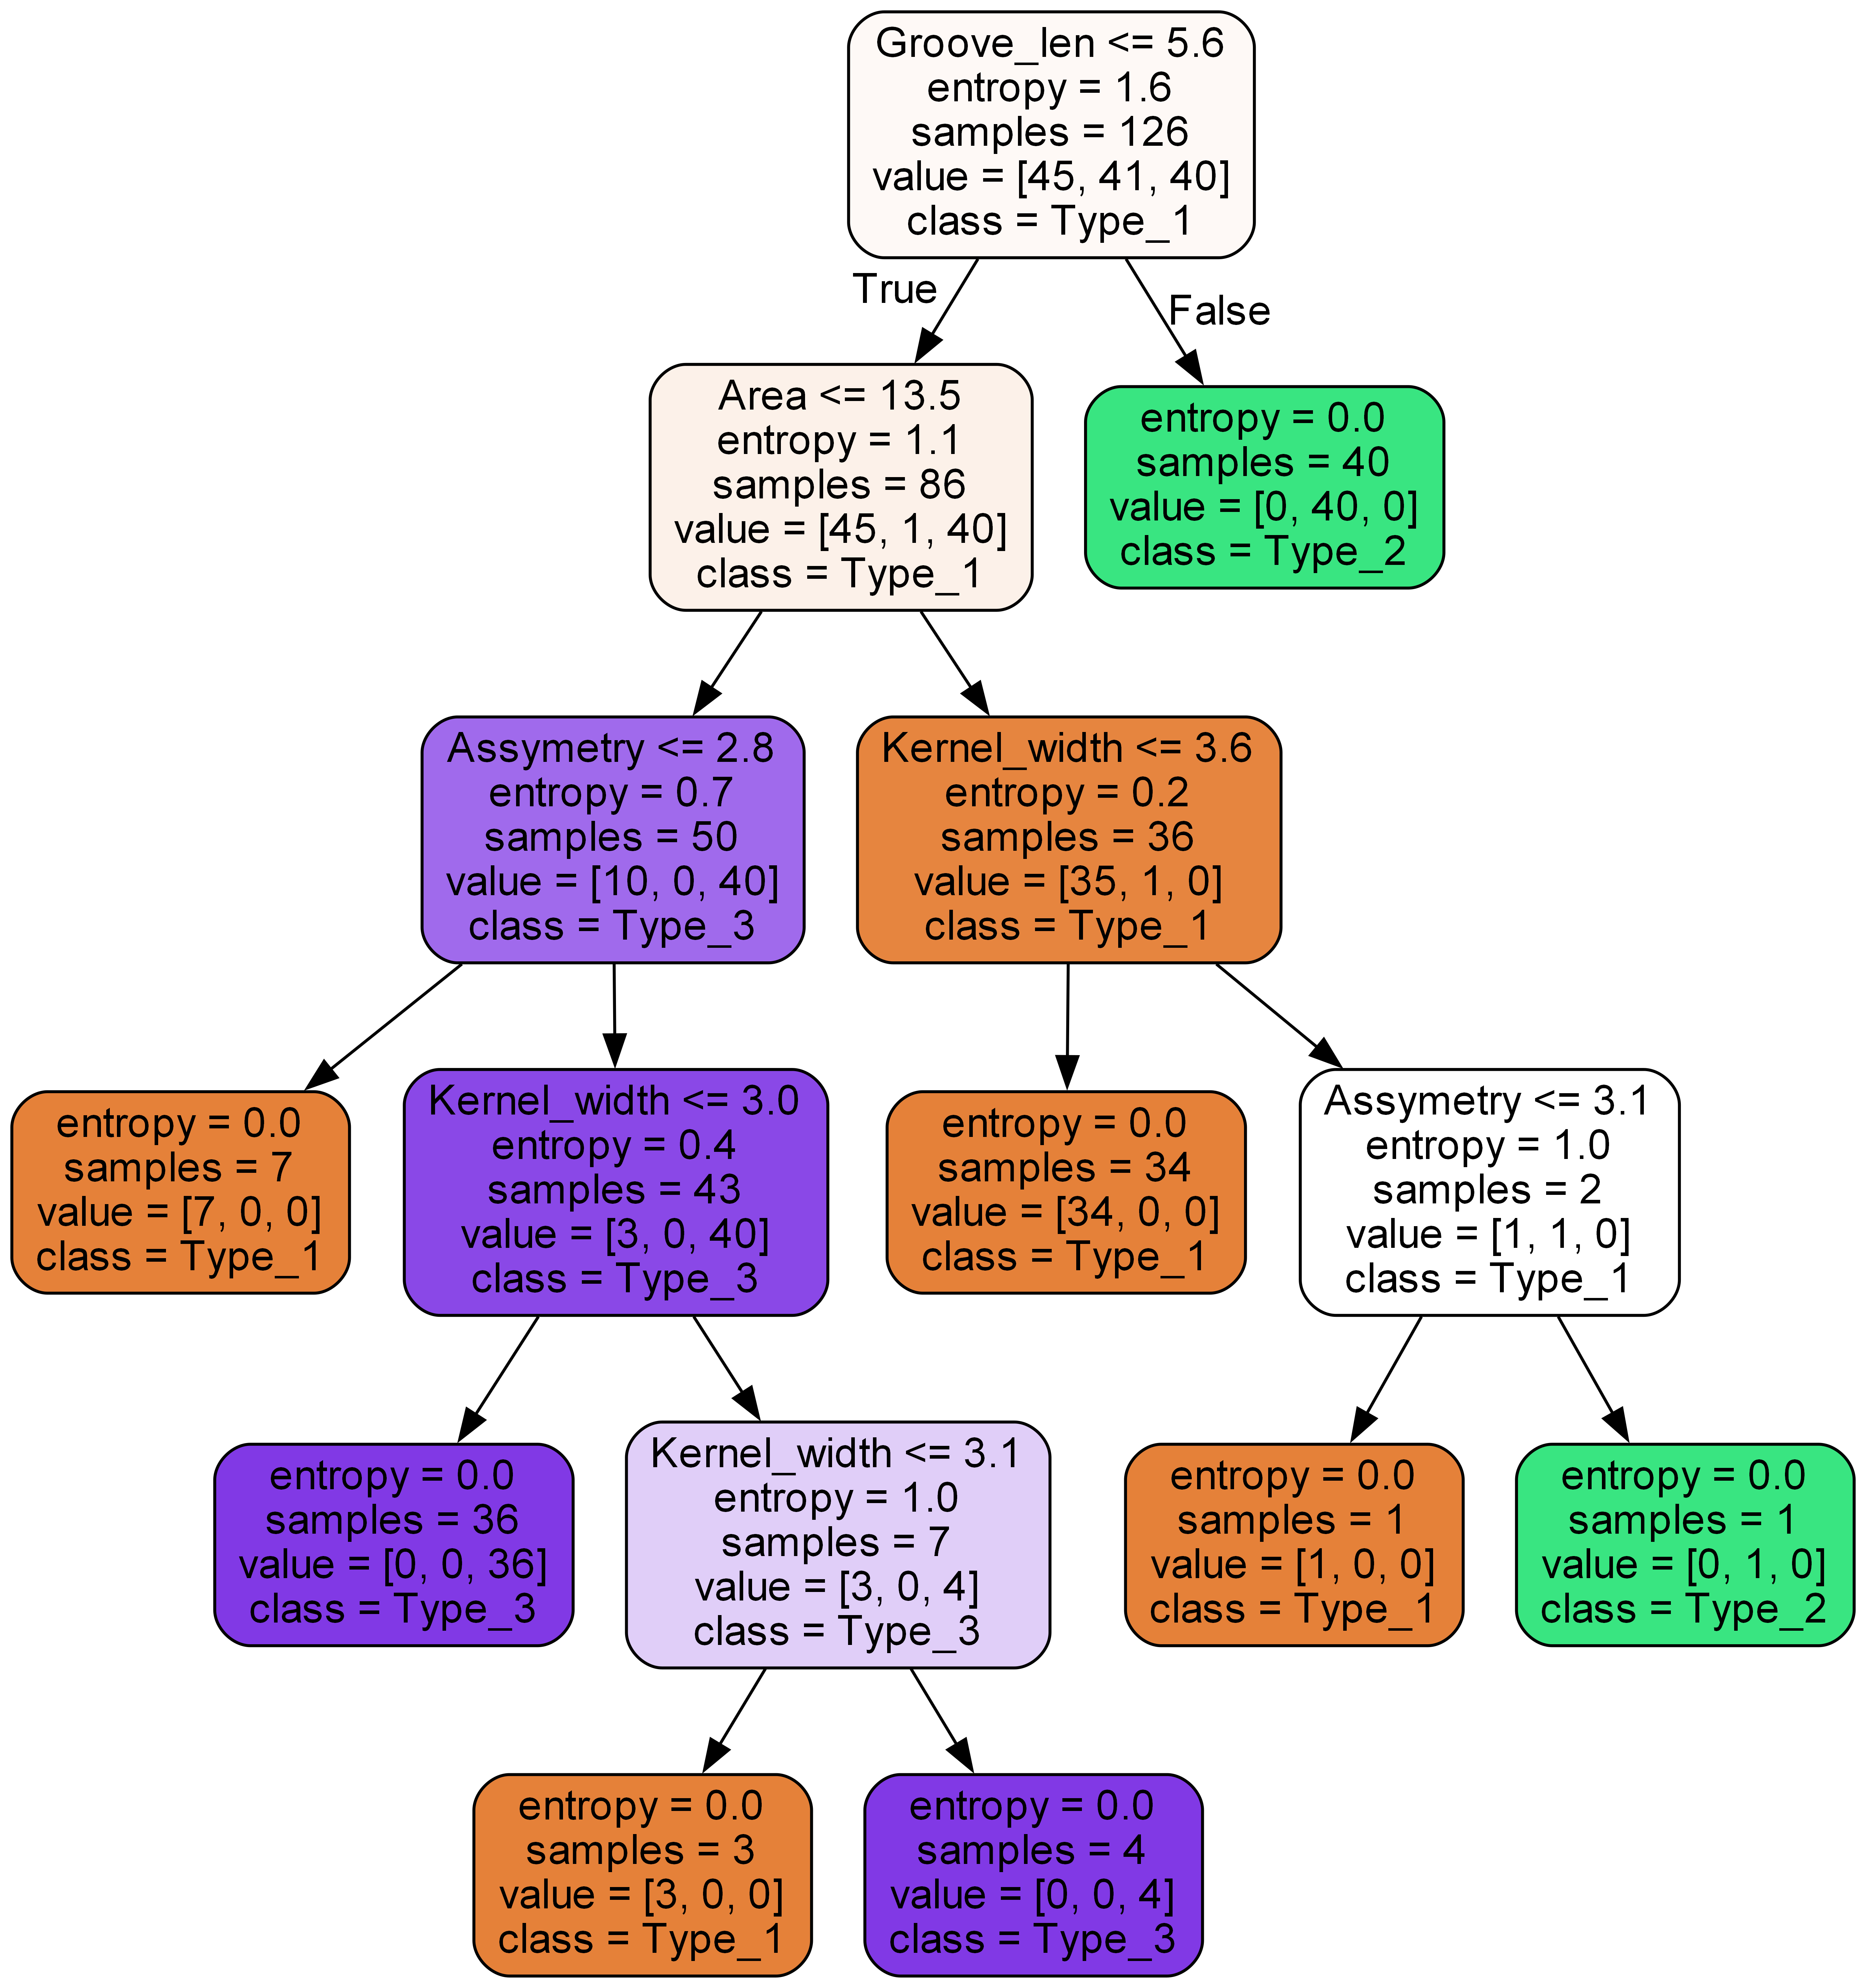

In [3]:
# Convert to png using system command (requires Graphviz)
# If you use Anaconda/Miniconda, simply install it using
# $ conda install -c conda-forge graphviz
# Otherwise, follow the 

from subprocess import call
call(['dot', '-Tpng', 'dot_filename', '-o', 'tree.png', '-Gdpi=300'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')
